In [ ]:
!mamba install obspy
!mamba install numpy
!mamba install matplotlib

In [2]:
import obspy
import matplotlib.pyplot as plt
import numpy as np

In [6]:
st = obspy.read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")
tr = st[0]
st

1 Trace(s) in Stream:
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples

In [5]:
tr_new = tr.copy()
tr_new.decimate(factor=4, strict_length=False)

.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.830000Z | 50.0 Hz, 9000 samples

In [7]:
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=0.4 * tr.stats.sampling_rate / 4.0)

.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples

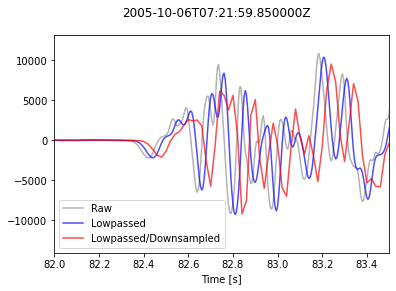

In [8]:
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
t_new = np.arange(0, tr_new.stats.npts / tr_new.stats.sampling_rate,
                  tr_new.stats.delta)

plt.plot(t, tr.data, 'k', label='Raw', alpha=0.3)
plt.plot(t, tr_filt.data, 'b', label='Lowpassed', alpha=0.7)
plt.plot(t_new, tr_new.data, 'r', label='Lowpassed/Downsampled', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(82, 83.5)
plt.suptitle(tr.stats.starttime)
plt.legend()
plt.show()